# Data Problem: (Questions asked by the management)

In [55]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
#display two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [57]:
#IMPORTING DATA FROM EXCEL - Sheet1
df = pd.read_excel(r'C:\Users\abrahamp\OneDrive - Hewlett Packard Enterprise\Documents\Personal Stuff\Class Notes\Data Science Course\Python for Data Science\edaretail.xlsx', sheet_name = 'Data1')
df.shape

(416, 12)

In [58]:
#IMPORTING DATA FROM EXCEL - Sheet1
df1 = pd.read_excel(r'C:\Users\abrahamp\OneDrive - Hewlett Packard Enterprise\Documents\Personal Stuff\Class Notes\Data Science Course\Python for Data Science\edaretail.xlsx', sheet_name = 'Data2')
df1.shape

(8, 5)

In [59]:
df.head(2)

,YEAR,WEEK,RS_SALES,POPULATION,UNIT_SALES,Sales/ Unit,STORE_NO,SPECIAL,WEEK_MAX_TEMP,WEEK_MIN_TEMP,RAIN_MM,SHORTAGE
0,2016,23,155438.16,127905.30,3487.00,44.61,21006,NORMAL,19.90,16.90,1.14,4.20
1,2016,3,101326.24,116382.30,2738.00,37.06,21006,NORMAL,8.00,3.22,0.07,9.40


In [60]:
print(df.isna().sum())
print(df.isnull().sum().sum())

YEAR             0
WEEK             0
RS_SALES         0
POPULATION       0
UNIT_SALES       3
Sales/ Unit      0
STORE_NO         0
SPECIAL          0
WEEK_MAX_TEMP    0
WEEK_MIN_TEMP    0
RAIN_MM          0
SHORTAGE         0
dtype: int64
3


In [61]:
df1.head(2)

,STORE_NO,CITY,STATE,FORMAT,REGION
0,21006,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL
1,21004,CHANDIGARH,PUNJAB,MEDIUMBOX,NORTH


# Create a complete dataset from the 2 pieces of data given to you

In [62]:
#Since there are 2 sheets and a common column between them we can Vlookup/ use the merge function in Pandas
dfn = pd.merge(df, df1, on ='STORE_NO', how ='left')
dfn.head()

,YEAR,WEEK,RS_SALES,POPULATION,UNIT_SALES,Sales/ Unit,STORE_NO,SPECIAL,WEEK_MAX_TEMP,WEEK_MIN_TEMP,RAIN_MM,SHORTAGE,CITY,STATE,FORMAT,REGION
0,2016,23,155438.16,127905.30,3487.00,44.61,21006,NORMAL,19.90,16.90,1.14,4.20,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL
1,2016,3,101326.24,116382.30,2738.00,37.06,21006,NORMAL,8.00,3.22,0.07,9.40,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL
2,2016,7,159751.29,118686.90,3792.00,42.18,21006,VALENTINES,16.00,10.89,0.00,5.10,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL
3,2016,11,138065.81,120991.50,3324.00,41.61,21006,NORMAL,15.50,11.72,0.07,7.50,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL
4,2016,15,139496.81,123296.10,3375.00,41.42,21006,NORMAL,14.90,11.90,0.02,7.70,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL


# Check if the values in the dataset are correct?

In [64]:
dfn.tail(2)

,YEAR,WEEK,RS_SALES,POPULATION,UNIT_SALES,Sales/ Unit,STORE_NO,SPECIAL,WEEK_MAX_TEMP,WEEK_MIN_TEMP,RAIN_MM,SHORTAGE,CITY,STATE,FORMAT,REGION
414,2016,1,1667374.67,565825.00,15659.00,106.48,21003,NEWYEAR,26.00,17.24,0.00,11.30,PUNE,MAHARASHTRA,MEGABOX,WEST
415,2016,49,769738.16,701623.00,16235.00,47.41,21003,NORMAL,25.12,16.33,6.23,9.00,PUNE,MAHARASHTRA,MEGABOX,WEST


In [65]:
16235 * 47.41

769701.35

In [66]:
dfn['Sales/ Unit'] = dfn['RS_SALES'] / dfn['UNIT_SALES']
dfn.sample(2)
## mean for units_sales

,YEAR,WEEK,RS_SALES,POPULATION,UNIT_SALES,Sales/ Unit,STORE_NO,SPECIAL,WEEK_MAX_TEMP,WEEK_MIN_TEMP,RAIN_MM,SHORTAGE,CITY,STATE,FORMAT,REGION
365,2016,33,652349.54,656357.00,14850.00,43.93,21003,NORMAL,21.89,17.11,3.41,12.00,PUNE,MAHARASHTRA,MEGABOX,WEST
356,2016,18,581053.22,455823.69,14044.00,41.37,21001,NORMAL,25.12,22.12,0.00,11.30,PANAJI,GOA,MEGABOX,WEST


In [69]:
14850 * 43.92926195286196

652349.54

In [68]:
652349.54 / 14850

43.92926195286196

# Are there NULLS? How to treat them?

In [71]:
print(dfn.isna().sum())
print(dfn.isnull().sum().sum())

YEAR             0
WEEK             0
RS_SALES         0
POPULATION       0
UNIT_SALES       3
Sales/ Unit      3
STORE_NO         0
SPECIAL          0
WEEK_MAX_TEMP    0
WEEK_MIN_TEMP    0
RAIN_MM          0
SHORTAGE         0
CITY             0
STATE            0
FORMAT           0
REGION           0
dtype: int64
6


In [72]:
dfn.loc[dfn.isnull().any(axis=1)]

,YEAR,WEEK,RS_SALES,POPULATION,UNIT_SALES,Sales/ Unit,STORE_NO,SPECIAL,WEEK_MAX_TEMP,WEEK_MIN_TEMP,RAIN_MM,SHORTAGE,CITY,STATE,FORMAT,REGION
15,2016,50,141143.79,143461.35,NaN,NaN,21006,NORMAL,21.00,17.22,0.17,8.00,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL
184,2016,44,27267.21,100481.00,NaN,NaN,21007,NORMAL,22.80,19.80,0.00,0.54,JAMSHEDPUR,JHARKHAND,MINIBOX,EAST
394,2016,18,605787.71,613920.12,NaN,NaN,21003,NORMAL,25.12,20.01,0.00,11.30,PUNE,MAHARASHTRA,MEGABOX,WEST


In [73]:
dfn['UNIT_SALES'].fillna(dfn['UNIT_SALES'].mean(), inplace=True)

In [74]:
dfn.loc[dfn.isnull().any(axis=1)]

,YEAR,WEEK,RS_SALES,POPULATION,UNIT_SALES,Sales/ Unit,STORE_NO,SPECIAL,WEEK_MAX_TEMP,WEEK_MIN_TEMP,RAIN_MM,SHORTAGE,CITY,STATE,FORMAT,REGION
15,2016,50,141143.79,143461.35,6973.87,NaN,21006,NORMAL,21.00,17.22,0.17,8.00,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL
184,2016,44,27267.21,100481.00,6973.87,NaN,21007,NORMAL,22.80,19.80,0.00,0.54,JAMSHEDPUR,JHARKHAND,MINIBOX,EAST
394,2016,18,605787.71,613920.12,6973.87,NaN,21003,NORMAL,25.12,20.01,0.00,11.30,PUNE,MAHARASHTRA,MEGABOX,WEST


In [75]:
dfn['Sales/ Unit'] = dfn['RS_SALES'] / dfn['UNIT_SALES']

In [1]:
dfn.loc[dfn.isnull().any(axis=1)]

NameError: name 'dfn' is not defined

# Publish a table for Average weekly Rain by City & Region

In [84]:
rain = dfn.groupby(['CITY','REGION'])['RAIN_MM'].mean()
rain

CITY        REGION 
BHOPAL      CENTRAL   0.34
CHANDIGARH  NORTH     0.55
GURGAON     NORTH     0.18
JAMSHEDPUR  EAST      2.33
MUMBAI      WEST      1.19
OOTY        SOUTH     3.28
PANAJI      WEST      2.33
PUNE        WEST      1.19
Name: RAIN_MM, dtype: float64

In [82]:
table = pd.crosstab(dfn['CITY'], dfn['REGION'], values=df['RAIN_MM'], aggfunc='mean')
table

REGION,CENTRAL,EAST,NORTH,SOUTH,WEST
CITY,,,,,
BHOPAL,0.34,NaN,NaN,NaN,NaN
CHANDIGARH,NaN,NaN,0.55,NaN,NaN
GURGAON,NaN,NaN,0.18,NaN,NaN
JAMSHEDPUR,NaN,2.33,NaN,NaN,NaN
MUMBAI,NaN,NaN,NaN,NaN,1.19
OOTY,NaN,NaN,NaN,3.28,NaN
PANAJI,NaN,NaN,NaN,NaN,2.33
PUNE,NaN,NaN,NaN,NaN,1.19


# Which City is the Hottest? (Hint: plot using a graph)

In [89]:
temp = dfn.groupby(['CITY'])['WEEK_MAX_TEMP'].max().nlargest(10)
temp

CITY
PANAJI       50.00
JAMSHEDPUR   39.00
MUMBAI       35.13
OOTY         35.13
PUNE         35.13
BHOPAL       28.40
CHANDIGARH   22.40
GURGAON      22.40
Name: WEEK_MAX_TEMP, dtype: float64

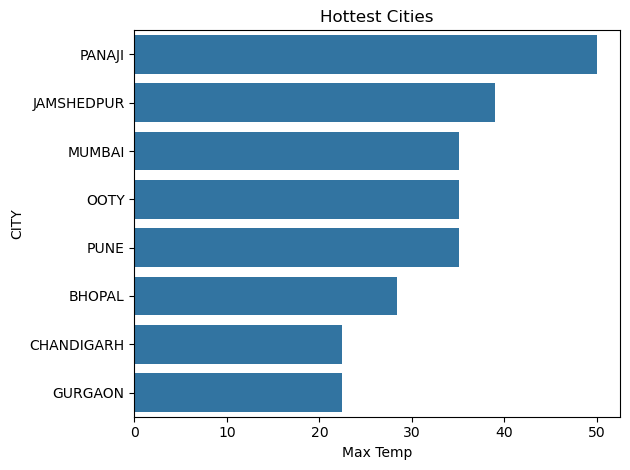

In [90]:
sns.barplot(x=temp.values, y=temp.index)
plt.title('Hottest Cities')
plt.xlabel('Max Temp')
plt.ylabel('CITY')
plt.tight_layout()
plt.show()

# Where are we seeing the maximum/ minimum shortages? (Hint: Analyze using SQC by formats)

In [96]:
smax = dfn.groupby(['FORMAT'])['SHORTAGE'].max().nlargest(1)
smin = dfn.groupby(['FORMAT'])['SHORTAGE'].min().nlargest(1)
print("the maximum shortage is in", smax)
print("the minimum shortage is in", smin)

the maximum shortage is in FORMAT
MEGABOX   13.20
Name: SHORTAGE, dtype: float64
the minimum shortage is in FORMAT
MEGABOX   4.80
Name: SHORTAGE, dtype: float64


In [108]:
sf = pd.crosstab(dfn['WEEK'], dfn['FORMAT'], values=dfn['SHORTAGE'], aggfunc='mean')
sf.head(2)

FORMAT,MEDIUMBOX,MEGABOX,MINIBOX
WEEK,,,
1,4.33,11.30,0.53
2,9.13,12.10,0.57


In [110]:
sf['midm'] = sf['MEDIUMBOX'].mean()
sf['megm'] = sf['MEGABOX'].mean()
sf['minm'] = sf['MINIBOX'].mean()
stdmid = sf['MEDIUMBOX'].std()
stdmeg = sf['MEGABOX'].std()
stdmin = sf['MINIBOX'].std()
#calculate UCL & LCL for MediumBox
sf['UCLmid'] = sf['midm'] + (3 * stdmid)
sf['LCLmid'] = sf['midm'] - (3 * stdmid)
#calculate UCL & LCL for MegaBox
sf['UCLmeg'] = sf['megm'] + (3 * stdmeg)
sf['LCLmeg'] = sf['megm'] - (3 * stdmeg)
#calculate UCL & LCL for MiniBox
sf['UCLmin'] = sf['minm'] + (3 * stdmin)
sf['LCLmin'] = sf['minm'] - (3 * stdmin)
sf.head(2)

FORMAT,MEDIUMBOX,MEGABOX,MINIBOX,midm,megm,minm,UCLmid,LCLmid,UCLmeg,LCLmeg,UCLmin,LCLmin
WEEK,,,,,,,,,,,,
1,4.33,11.30,0.53,6.74,11.20,0.53,11.97,1.52,16.70,5.70,0.78,0.27
2,9.13,12.10,0.57,6.74,11.20,0.53,11.97,1.52,16.70,5.70,0.78,0.27


In [ ]:
sf["midm"].plot()
sf["MEDIUMBOX"].plot(marker="o")
sf["UCLmid"].plot()
sf["LCLmid"].plot()

<Axes: xlabel='WEEK'>

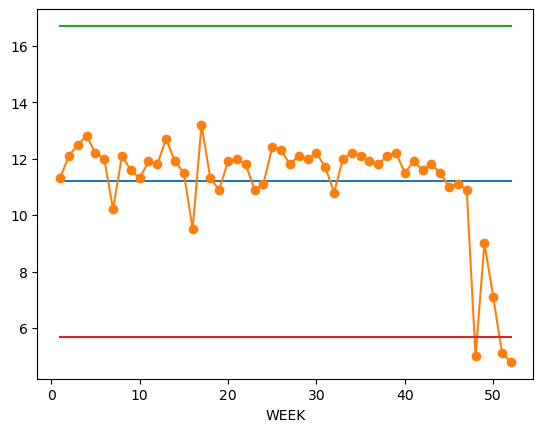

In [112]:
sf["megm"].plot()
sf["MEGABOX"].plot(marker="o")
sf["UCLmeg"].plot()
sf["LCLmeg"].plot()

<Axes: xlabel='WEEK'>

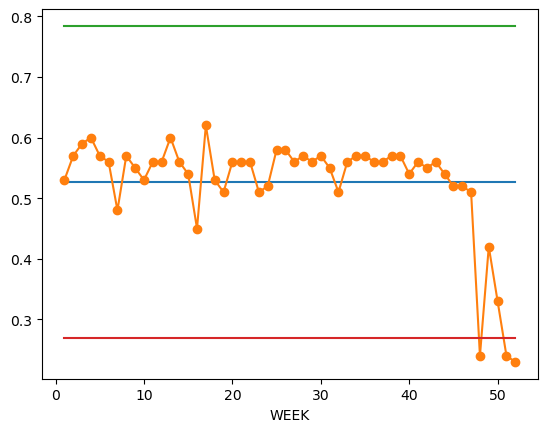

In [113]:
sf["minm"].plot()
sf["MINIBOX"].plot(marker="o")
sf["UCLmin"].plot()
sf["LCLmin"].plot()

# In terms of average sales, which format is better? (Hint: include Shortage in Sales)

In [115]:
dfn['RS_SALES_NEW'] = dfn['RS_SALES'] + (dfn['RS_SALES'] * dfn['SHORTAGE'] / 100)
dfn.head(2)

,YEAR,WEEK,RS_SALES,POPULATION,UNIT_SALES,Sales/ Unit,STORE_NO,SPECIAL,WEEK_MAX_TEMP,WEEK_MIN_TEMP,RAIN_MM,SHORTAGE,CITY,STATE,FORMAT,REGION,RS_SALES_NEW
0,2016,23,155438.16,127905.30,3487.00,44.58,21006,NORMAL,19.90,16.90,1.14,4.20,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL,161966.56
1,2016,3,101326.24,116382.30,2738.00,37.01,21006,NORMAL,8.00,3.22,0.07,9.40,BHOPAL,MADHYAPRADESH,MEDIUMBOX,CENTRAL,110850.91


In [140]:
better = pd.DataFrame({
    'SALES' : dfn.groupby(['FORMAT'])['RS_SALES'].mean(),
    'SALES_SHORTAGE' : dfn.groupby(['FORMAT'])['RS_SALES_NEW'].mean()
})
better

,SALES,SALES_SHORTAGE
FORMAT,,
MEDIUMBOX,129715.58,138131.75
MEGABOX,666786.83,739425.48
MINIBOX,30621.60,30778.43


In [142]:
better['DIFF'] = better['SALES'] - better['SALES_SHORTAGE']
better

,SALES,SALES_SHORTAGE,DIFF
FORMAT,,,
MEDIUMBOX,129715.58,138131.75,-8416.18
MEGABOX,666786.83,739425.48,-72638.65
MINIBOX,30621.60,30778.43,-156.83


# What is the Sales trend by weeks across formats? (Hint: plot using a graph)

In [149]:
strend = pd.crosstab(dfn['WEEK'], dfn['FORMAT'], values=dfn['RS_SALES'], aggfunc='sum')
strend.head(2)

FORMAT,MEDIUMBOX,MEGABOX,MINIBOX
WEEK,,,
1,567339.32,3540461.59,88145.27
2,296660.89,1901504.97,58168.14


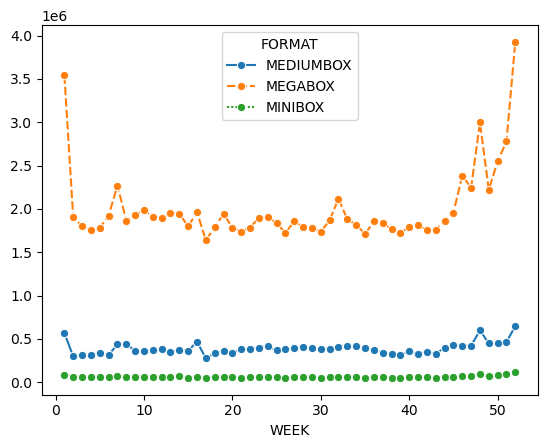

In [150]:
sns.lineplot(data=strend, marker='o')
plt.show()

# Is Sales Correlated to any of the variables? What is influencing Sales?

In [152]:
newdf = dfn.copy()

In [153]:
newdf.columns

Index(['YEAR', 'WEEK', 'RS_SALES', 'POPULATION', 'UNIT_SALES', 'Sales/ Unit',
       'STORE_NO', 'SPECIAL', 'WEEK_MAX_TEMP', 'WEEK_MIN_TEMP', 'RAIN_MM',
       'SHORTAGE', 'CITY', 'STATE', 'FORMAT', 'REGION', 'RS_SALES_NEW'],
      dtype='object')

In [154]:
newdf.shape

(416, 17)

In [155]:
inf = newdf.drop(['YEAR', 'WEEK', 'STORE_NO', 'SPECIAL', 'CITY', 'STATE', 'FORMAT', 'REGION'], axis=1)
inf.shape

(416, 9)

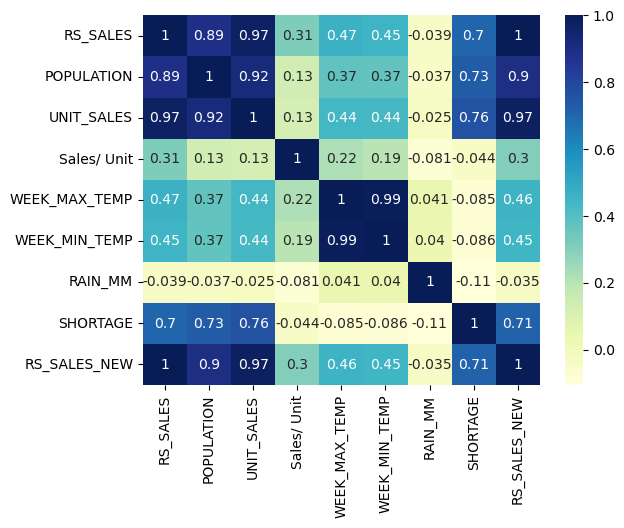

In [157]:
correl = sns.heatmap(inf.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# Comment on the performance of each store? What action should the management of each store take ?(Hint: Measures of Central Tendency, Dispersion, Shape)

In [162]:
pr = pd.DataFrame({
    'ct' : dfn.groupby(['CITY'])['RS_SALES'].count(),
    'sum' : dfn.groupby(['CITY'])['RS_SALES'].sum(),
    'mean' : dfn.groupby(['CITY'])['RS_SALES'].mean(),
    'sd' : dfn.groupby(['CITY'])['RS_SALES'].std(),
    'min' : dfn.groupby(['CITY'])['RS_SALES'].min(),
    'q1' : dfn.groupby(['CITY'])['RS_SALES'].quantile(0.25),
    'mid' : dfn.groupby(['CITY'])['RS_SALES'].median(),
    'q3' : dfn.groupby(['CITY'])['RS_SALES'].quantile(0.75),
    'max' : dfn.groupby(['CITY'])['RS_SALES'].max(),
    'ran' : dfn.groupby(['CITY'])['RS_SALES'].max() - dfn.groupby(['CITY'])['RS_SALES'].min(),
    'iqr' : dfn.groupby(['CITY'])['RS_SALES'].quantile(0.75) - dfn.groupby(['CITY'])['RS_SALES'].quantile(0.25),
    'low' : dfn.groupby(['CITY'])['RS_SALES'].quantile(0.25) - (1.5 * (dfn.groupby(['CITY'])['RS_SALES'].quantile(0.75) - dfn.groupby(['CITY'])['RS_SALES'].quantile(0.25))),
    'up' : dfn.groupby(['CITY'])['RS_SALES'].quantile(0.75) + (1.5 * (dfn.groupby(['CITY'])['RS_SALES'].quantile(0.75) - dfn.groupby(['CITY'])['RS_SALES'].quantile(0.25))),
    'var' : dfn.groupby(['CITY'])['RS_SALES'].var(),
    'coff' : dfn.groupby(['CITY'])['RS_SALES'].std() / dfn.groupby(['CITY'])['RS_SALES'].mean() * 100,
    'skew' : dfn.groupby(['CITY'])['RS_SALES'].skew(),
    #'kurt' : dfn.groupby(['CITY'])['RS_SALES'].kurtosis()
})
pr

,ct,sum,mean,sd,min,q1,mid,q3,max,ran,iqr,low,up,var,coff,skew
CITY,,,,,,,,,,,,,,,,
BHOPAL,52,7168719.91,137860.00,27830.12,96272.58,116604.99,138143.60,148541.93,230053.70,133781.12,31936.94,68699.59,196447.33,774515410.46,20.19,1.18
CHANDIGARH,52,7421512.04,142721.39,21884.82,105652.50,127568.31,139064.03,151150.02,232387.93,126735.43,23581.71,92195.75,186522.58,478945279.85,15.33,1.80
GURGAON,52,5645398.17,108565.35,31100.17,73337.50,89810.31,100171.78,113935.01,208829.53,135492.03,24124.70,53623.26,150122.05,967220420.34,28.65,1.78
JAMSHEDPUR,52,1568081.76,30155.42,6485.24,21537.34,26886.57,28098.00,29735.55,60026.53,38489.19,2848.98,22613.11,34009.02,42058312.70,21.51,2.70
MUMBAI,52,34351996.83,660615.32,134966.28,521799.33,595522.70,619723.23,640444.54,1194569.89,672770.56,44921.84,528139.94,707827.30,18215897925.18,20.43,2.55
OOTY,52,1616564.56,31087.78,6351.35,24555.26,28024.60,29163.45,30138.57,56215.05,31659.79,2113.97,24853.64,33309.52,40339704.76,20.43,2.55
PANAJI,52,33321737.37,640802.64,137811.31,457668.49,571339.69,597082.47,631880.48,1275563.80,817895.31,60540.79,480528.51,722691.67,18991956833.64,21.51,2.70
PUNE,52,36345011.48,698942.53,197687.02,548710.89,614835.67,646564.42,674656.43,1667374.67,1118663.78,59820.76,525104.52,764387.57,39080156061.15,28.28,3.68
